In [137]:
import pandas as pd
import seaborn as sns

In [5]:
df=pd.read_csv('BlackFriday.csv')

In [9]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [13]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [21]:
df.dropna(inplace=True)
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 164278 entries, 1 to 537573
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     164278 non-null  int64  
 1   Product_ID                  164278 non-null  object 
 2   Gender                      164278 non-null  object 
 3   Age                         164278 non-null  object 
 4   Occupation                  164278 non-null  int64  
 5   City_Category               164278 non-null  object 
 6   Stay_In_Current_City_Years  164278 non-null  object 
 7   Marital_Status              164278 non-null  int64  
 8   Product_Category_1          164278 non-null  int64  
 9   Product_Category_2          164278 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    164278 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 16.3+ MB


In [31]:
df1=df['Age'].unique()

array(['0-17', '46-50', '26-35', '51-55', '36-45', '18-25', '55+'],
      dtype=object)

<Axes: title={'center': 'Age_Distribtion'}>

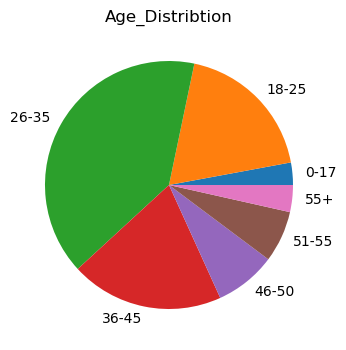

In [59]:
df.groupby('Age').size().plot(kind="pie",figsize=(4,8),title="Age_Distribtion")


In [129]:
df.groupby('Age').count()["Product_ID"]

Age
0-17      4789
18-25    30889
26-35    65916
36-45    32758
46-50    13135
51-55    11018
55+       5773
Name: Product_ID, dtype: int64

In [117]:
lst=[]
for i in df['Age'].unique():
    lst.append([i,df[df['Age']==i]['Product_ID'].nunique()])
data=pd.DataFrame(lst,columns=['Age','Products'])    

In [125]:
df['Product_ID'].unique()

array(['P00248942', 'P00184942', 'P00145042', 'P00231342', 'P0096642',
       'P00036842', 'P00249542', 'P00303442', 'P00078742', 'P00085942',
       'P00182642', 'P00155442', 'P00221342', 'P00111142', 'P0094542',
       'P00148642', 'P00113242', 'P00110842', 'P00182342', 'P00042142',
       'P00244242', 'P00019342', 'P00073842', 'P00190742', 'P00151842',
       'P00112642', 'P00034442', 'P00222242', 'P00118342', 'P00324742',
       'P00190042', 'P00158542', 'P00112542', 'P00127842', 'P00125942',
       'P00058142', 'P00251642', 'P00351142', 'P00262242', 'P00225842',
       'P00278942', 'P00177442', 'P00000642', 'P00288942', 'P00270942',
       'P00345842', 'P00032042', 'P00031842', 'P00206442', 'P00046742',
       'P00289342', 'P00281742', 'P00266642', 'P00026042', 'P00216342',
       'P00102642', 'P00127442', 'P00345642', 'P00115342', 'P00037142',
       'P00192042', 'P00086442', 'P00028442', 'P00277442', 'P00085242',
       'P00142142', 'P00030942', 'P00112142', 'P00273442', 'P00321

In [119]:
data

,Age,Products
0,0-17,452
1,46-50,507
2,26-35,524
3,51-55,491
4,36-45,521
5,18-25,515
6,55+,459


In [93]:
lst = []
for i in df['Age'].unique():
    lst.append([i, df[df['Age'] == i]['Product_ID'].nunique()])
    
data = pd.DataFrame(lst , columns = ['Age','Products'])

In [97]:
data

,Age,Products
0,0-17,452
1,46-50,507
2,26-35,524
3,51-55,491
4,36-45,521
5,18-25,515
6,55+,459


<Axes: xlabel='Age'>

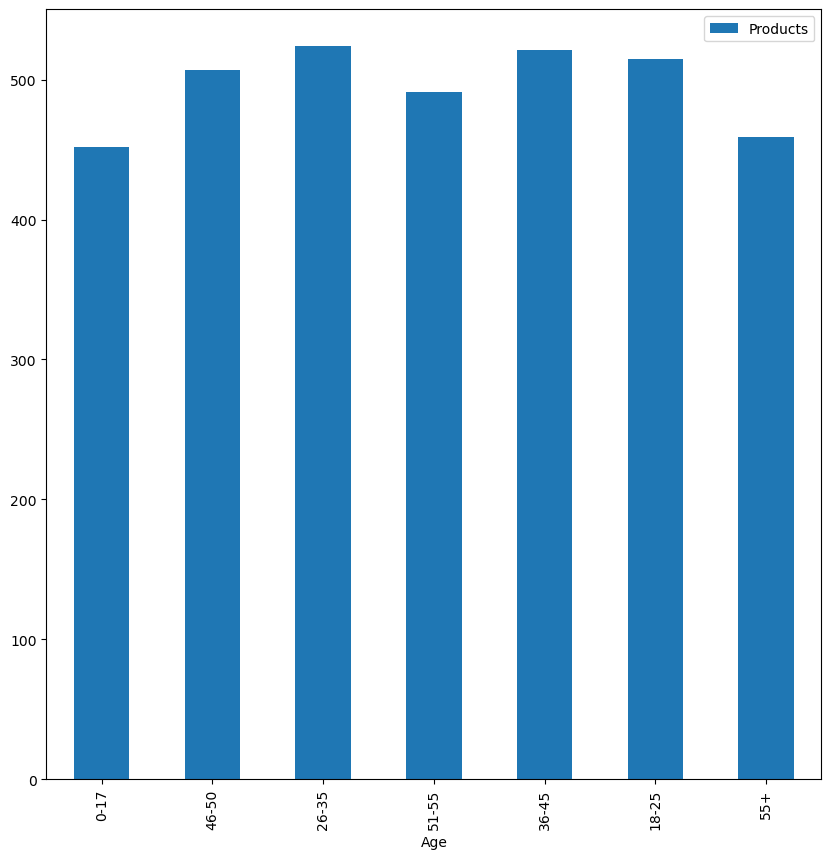

In [103]:
data.plot.bar(x="Age",figsize=(10,10))

<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

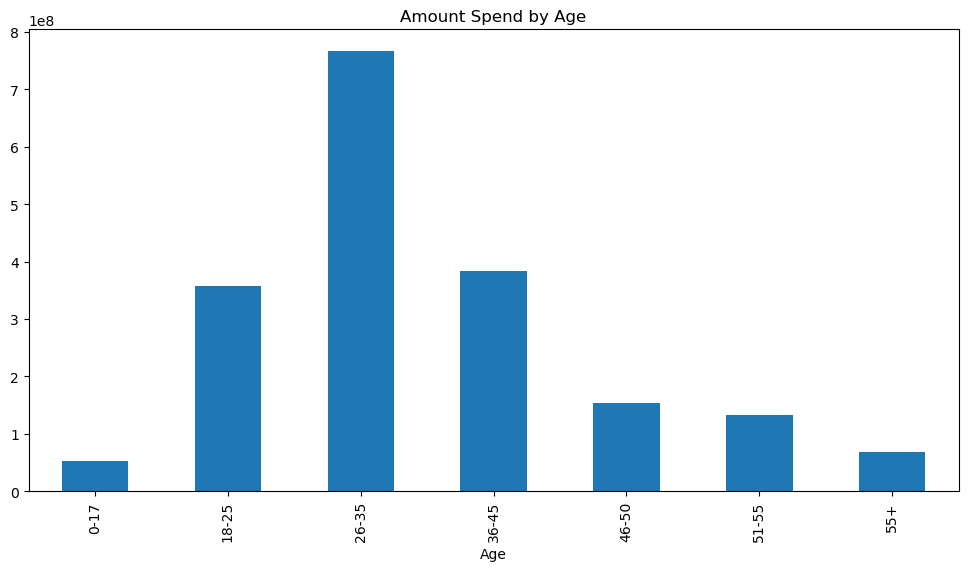

In [107]:
df.groupby('Age').sum()['Purchase'].plot(kind = 'bar', figsize = (12, 6), title = 'Amount Spend by Age')

<Axes: >

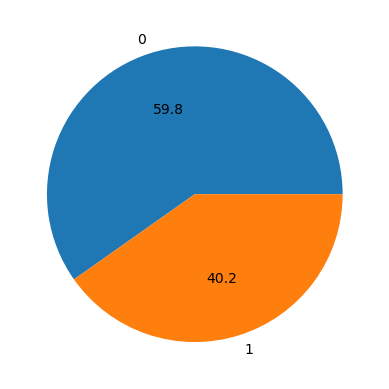

In [133]:
df.groupby('Marital_Status').size().plot(kind = 'pie', autopct = '%0.1f')

#   multiple column analysis 

<Axes: xlabel='Age', ylabel='count'>

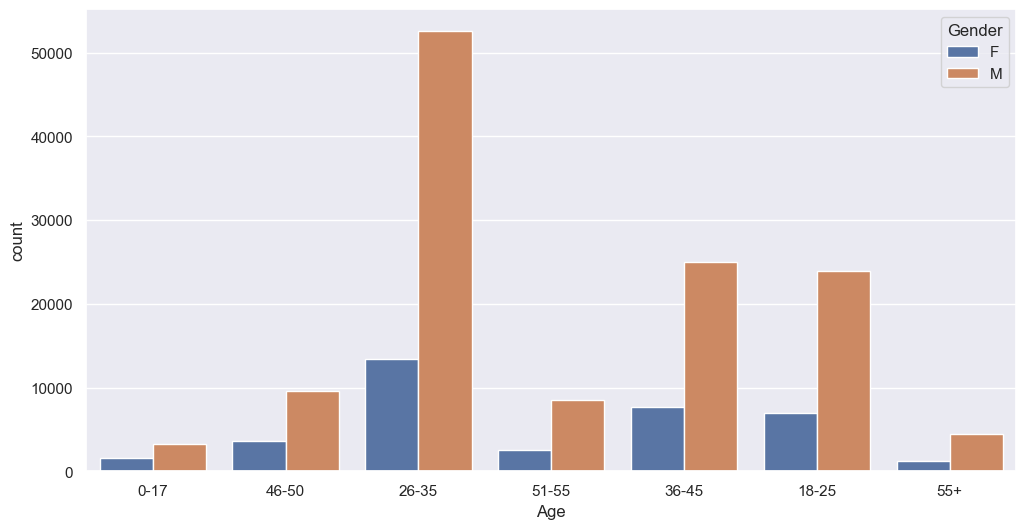

In [143]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(data=df,x='Age',hue="Gender")

<Axes: xlabel='Gender', ylabel='count'>

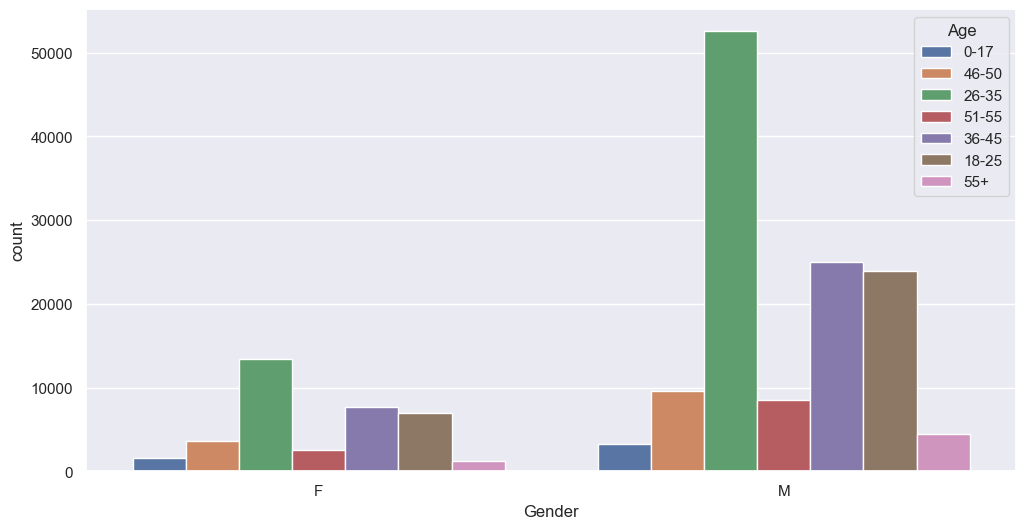

In [147]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(data=df,x='Gender',hue="Age")

<Axes: >

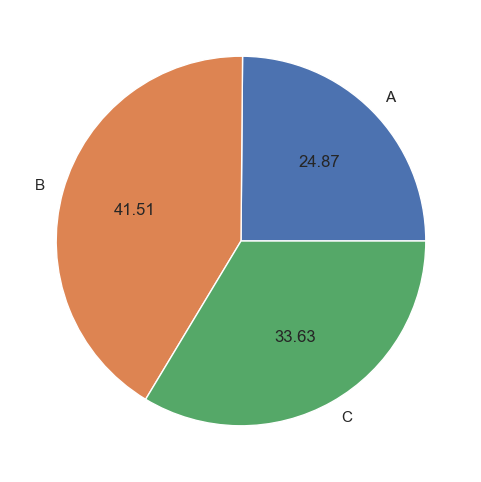

In [169]:
df.groupby('City_Category').size().plot(kind="pie",autopct="%0.2f")

<Axes: xlabel='Gender', ylabel='count'>

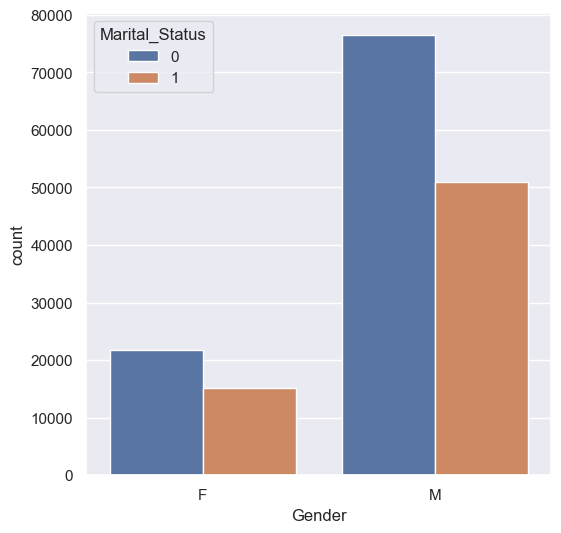

In [171]:
sns.set(rc = {'figure.figsize' : (6,6)})
sns.countplot(x = "Gender", hue = 'Marital_Status', data = df)

<Axes: xlabel='Marital_Status', ylabel='count'>

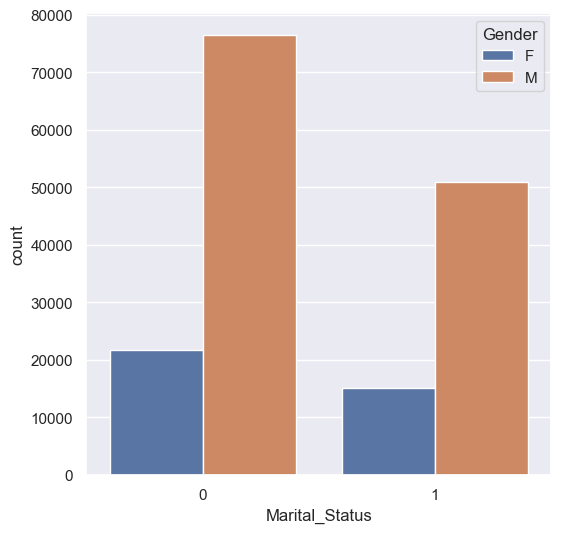

In [173]:
sns.set(rc = {'figure.figsize' : (6,6)})
sns.countplot(x = "Marital_Status", hue = 'Gender', data = df)

In [157]:
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164278 entries, 1 to 537573
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     164278 non-null  int64  
 1   Product_ID                  164278 non-null  object 
 2   Gender                      164278 non-null  object 
 3   Age                         164278 non-null  object 
 4   Occupation                  164278 non-null  int64  
 5   City_Category               164278 non-null  object 
 6   Stay_In_Current_City_Years  164278 non-null  object 
 7   Marital_Status              164278 non-null  int64  
 8   Product_Category_1          164278 non-null  int64  
 9   Product_Category_2          164278 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    164278 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 16.3+ MB


<Axes: xlabel='Age', ylabel='count'>

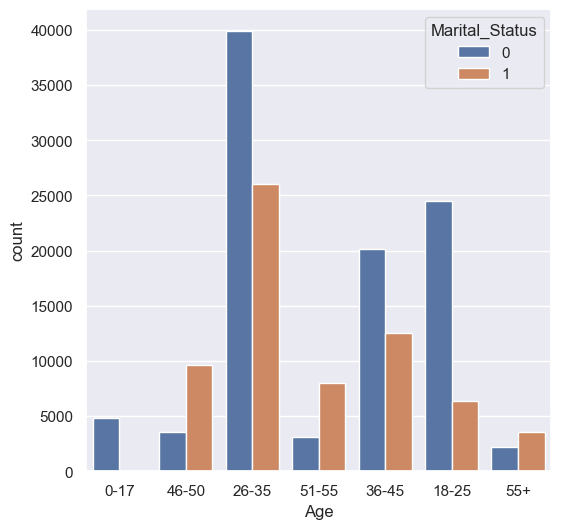

In [175]:
sns.set(rc = {'figure.figsize' : (6,6)})
sns.countplot(x = "Age", hue = 'Marital_Status', data = df)

<Axes: >

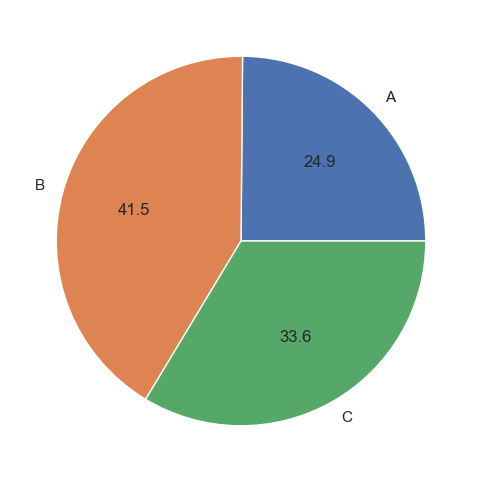

In [179]:
df.groupby('City_Category').size().plot(kind = 'pie', autopct = '%0.1f')

In [185]:
df.groupby('City_Category').sum()['Purchase'].plot(kind = 'pie', autopct = "%0.1f")

KeyboardInterrupt: 

## occupation and products analy

In [191]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,1000005,P00145042,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,1000006,P00231342,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,1000006,P0096642,F,51-55,9,A,1,0,2,3.0,4.0,13055


In [197]:
df['Occupation'].unique()

array([10,  7, 20,  9,  1, 12, 17,  0,  3, 15,  4, 11,  8, 16, 19,  2, 14,
       13,  6,  5, 18], dtype=int64)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

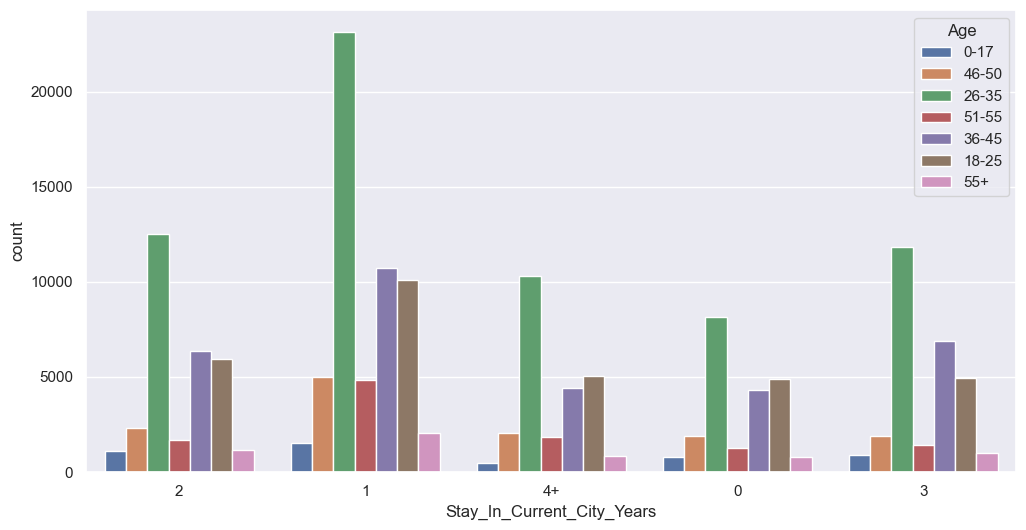

In [354]:
#sns.set(rc={"figure.figSize":(6,6)})
sns.set(rc = {"figure.figsize" : (12,6)})
sns.countplot(x=df['Stay_In_Current_City_Years'],hue=df["Age"])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

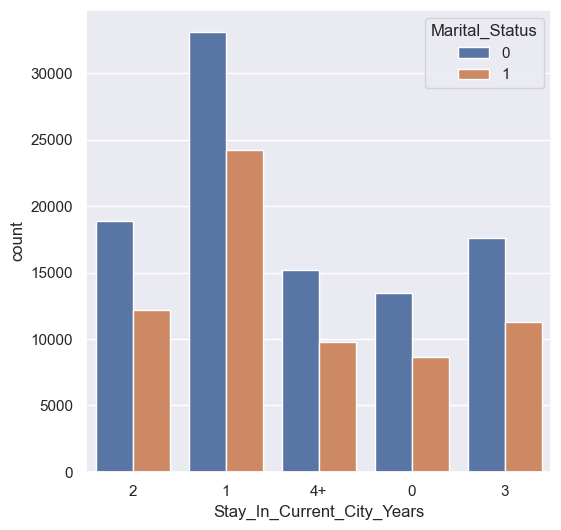

In [213]:
sns.countplot(data=df,x="Stay_In_Current_City_Years",hue="Marital_Status")

In [217]:
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215


In [240]:
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215


<Axes: xlabel='Stay_In_Current_City_Years'>

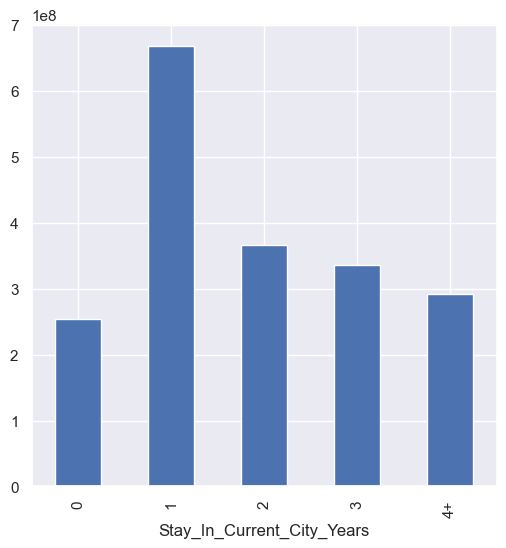

In [232]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind="bar")

In [246]:
df.groupby('Stay_In_Current_City_Years').mean()['Purchase'].plot(kind="pie")

TypeError: agg function failed [how->mean,dtype->object]

<Axes: xlabel='Occupation'>

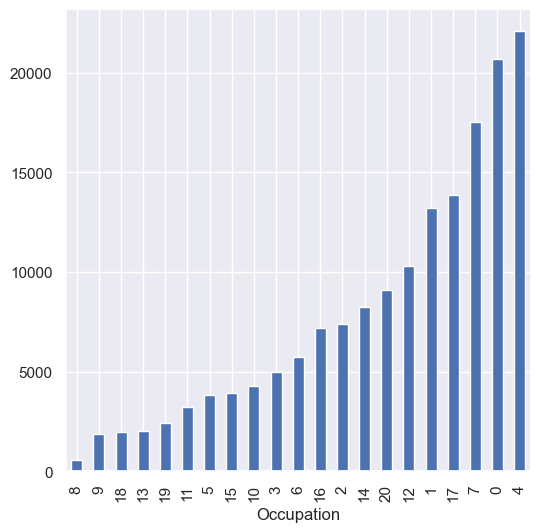

In [252]:
df.groupby("Occupation").size().sort_values().plot(kind="bar")

<Axes: title={'center': 'occupation by purchsed'}, xlabel='Occupation'>

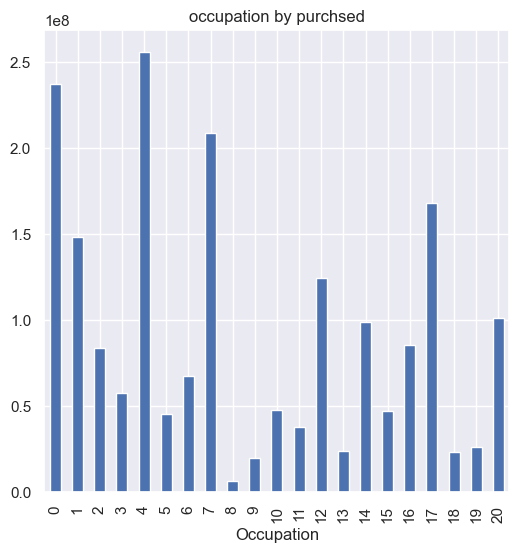

In [262]:
df.groupby("Occupation").sum()['Purchase'].plot(kind="bar",title="occupation by purchsed")

<Axes: title={'center': 'occupation by purchsed'}, xlabel='Occupation'>

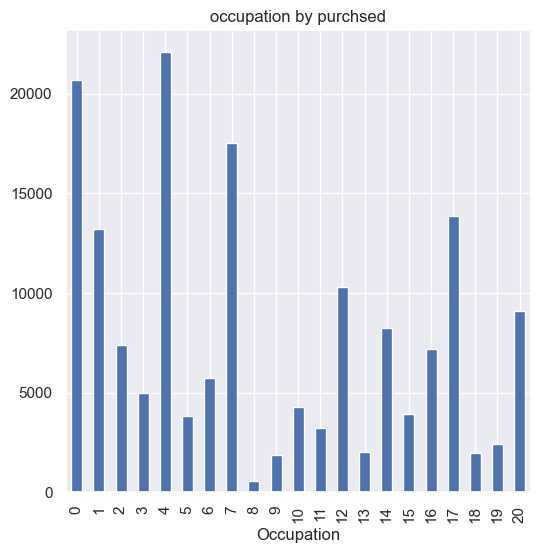

In [270]:
df.groupby("Occupation").count()['Purchase'].plot(kind="bar",title="occupation by purchsed")

In [274]:
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215


<Axes: xlabel='Occupation', ylabel='count'>

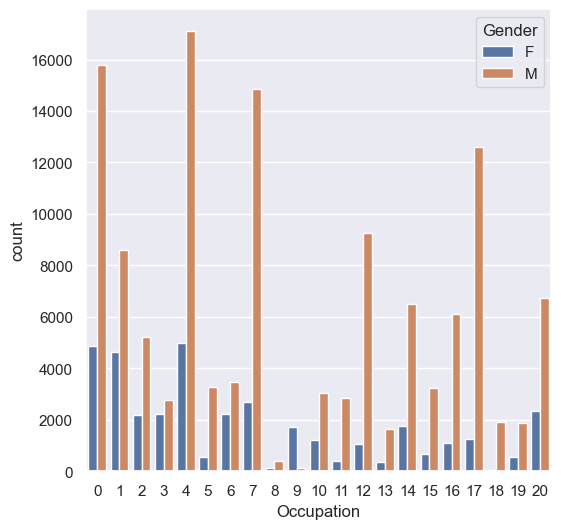

In [282]:
sns.countplot(data=df,x="Occupation",hue="Gender")

<Axes: ylabel='Product_ID'>

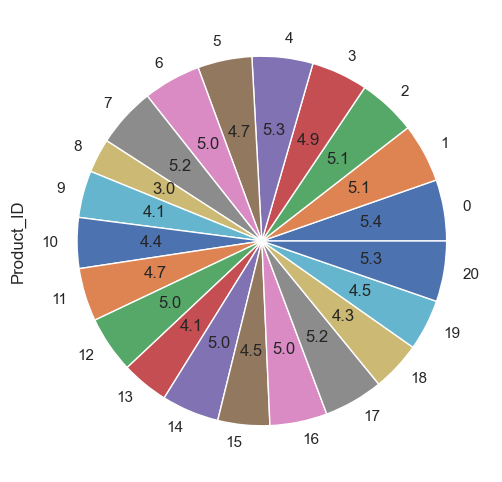

In [292]:
df.groupby("Occupation").nunique()["Product_ID"].plot(kind="pie",autopct="%0.1f")

<Axes: xlabel='Occupation'>

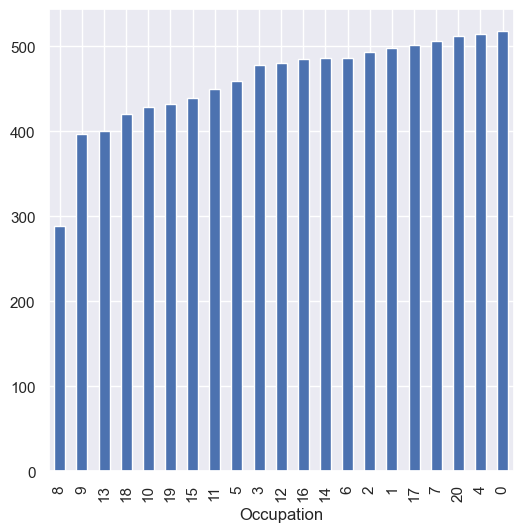

In [296]:
df.groupby("Occupation").nunique()["Product_ID"].sort_values().plot(kind="bar")

<Axes: xlabel='Product_ID'>

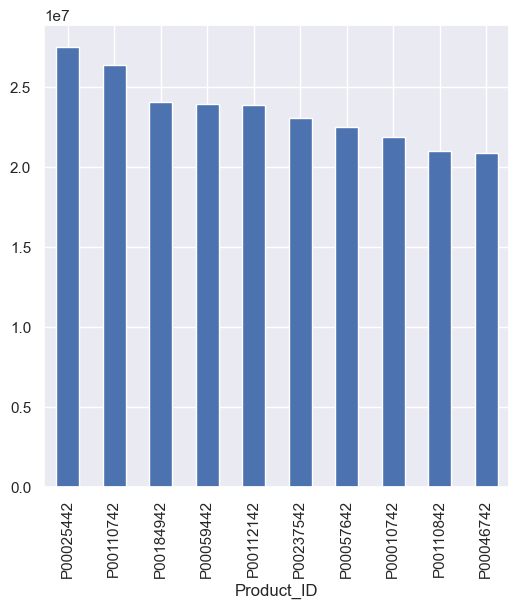

In [310]:
df.groupby("Product_ID").sum()["Purchase"].nlargest(10).plot(kind="bar")

<Axes: xlabel='Product_ID'>

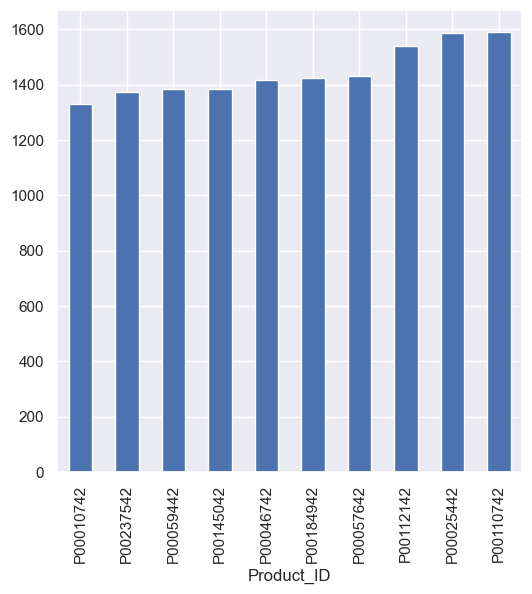

In [312]:
df.groupby('Product_ID').size().nlargest(10).sort_values().plot(kind = 'bar')

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164278 entries, 1 to 537573
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     164278 non-null  int64 
 1   Product_ID                  164278 non-null  object
 2   Gender                      164278 non-null  object
 3   Age                         164278 non-null  object
 4   Occupation                  164278 non-null  int64 
 5   City_Category               164278 non-null  object
 6   Stay_In_Current_City_Years  164278 non-null  object
 7   Marital_Status              164278 non-null  int64 
 8   Product_Category_1          164278 non-null  int64 
 9   Purchase                    164278 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 13.8+ MB


## combining the Gender and Martial status

In [328]:
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
